# 1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Nick/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'xlabel', 'ylabel']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


First we load in the data and take a look

In [87]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
ionosphere = pd.read_csv(url)
ionosphere.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In the following section the columns are assigned reasonable names for the sake of easily identifying them in the future:

In [88]:
clmns = []
pulse_no1 = 0

for i in range(0, ionosphere.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
    clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))

clmns.append('Structure detected')

In [89]:
ionosphere.columns = clmns

In [90]:
ionosphere.head()

,Pulse 1.1,Pulse 1.2,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


Let's do little bit of processing of different variables that might be interesting to look at. First, we look at the datatype of each column:

In [91]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
Pulse 1.1             350 non-null int64
Pulse 1.2             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null floa

Column Pulse 1.1 looks suspiciosly uniform. We check whether all entries of Pulse 1.1 are 1:

In [92]:
ionosphere.isin([1]).sum(axis = 0)[:1] #checking whether all entries of Pulse 1.1 are 1

Pulse 1.1    312
dtype: int64

Not all entries of Pulse 1.1 are 1.  However, column Pulse 1.2 looks suspiciosly uniform as well. We check whether all entries of Pulse 1.2 are 0:

In [93]:
ionosphere.isin([0]).sum(axis = 0)[1:2] #checking whether all entries of Pulse 1.2 are 0

Pulse 1.2    350
dtype: int64

We see that column Pulse 1.2 is constant and can be dropped:

In [94]:
ionosphere = ionosphere.drop(['Pulse 1.2'], axis = 1)
ionosphere

,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


Just in case, the datatype inconsistensy is analyzed in a different way as well:

In [95]:
# Detecting dtype inconsistency
print('Columns with data type inconsistensy:')
n_weird_columns = 0
for col in ionosphere.columns:
    weird = (ionosphere[[col]].applymap(type) != ionosphere[[col]].iloc[0].apply(type)).any(axis=1)
    if len(ionosphere[weird]) > 0:
        print(col)
        n_weird_columns = n_weird_columns + 1
if (n_weird_columns == 0):
    print('None')

Columns with data type inconsistensy:
None


The last column has the 'object' type. It is transformed into numerical values with 0 corresponding to 'b' and 1 corresponding to 'g' as follows:

In [96]:
for i in range(len(ionosphere['Structure detected'])):
    y_i = ionosphere['Structure detected'][i]
    if (y_i == 'b'):
        ionosphere['Structure detected'][i] = 0
    elif (y_i == 'g'):
        ionosphere['Structure detected'][i] = 1

ionosphere = ionosphere.astype({'Structure detected': 'int64'})
ionosphere.head()

/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [97]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 34 columns):
Pulse 1.1             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null float64
Pulse 11.2            350 non-null fl

Splitting the data into the test and train datasets:

In [98]:
msk = np.random.rand(len(ionosphere)) < 0.8
train = ionosphere[msk]
test = ionosphere[~msk]
print('Train entries: ' + str(len(train)))
print('Test entries: ' + str(len(test)))

Train entries: 289
Test entries: 61


Checking how much of the train data are good and bad:

In [99]:
X_train = train.iloc[:, :-1] # feature values
y_train = train.iloc[:, -1] # target values

print('Number of good entries: ' + str(train.loc[y_train == 1].shape[0]))
print('Number of bad entries: ' + str(train.loc[y_train == 0].shape[0]))

Number of good entries: 182
Number of bad entries: 107


We can take a look at the prior probability of 'good' entries:

In [100]:
prior = train.loc[y_train == 1].shape[0] / (train.loc[y_train == 1].shape[0] + train.loc[y_train == 0].shape[0])
prior

0.629757785467128

We can plot some data to see potential dependencies. In this section dependencies between Pulses i.1 and i.2 are plotted for $i = 2, 3, ..., 17$ ($i=1$ is obscluded since Pulse 1.2 is constant and dropped).

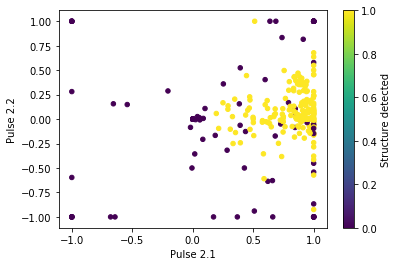

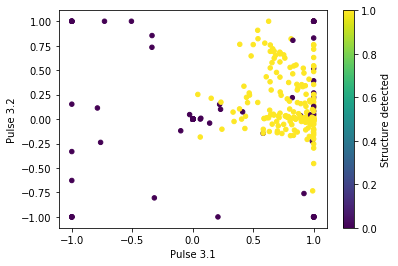

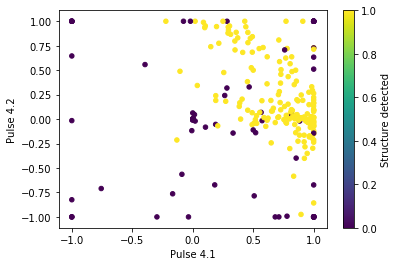

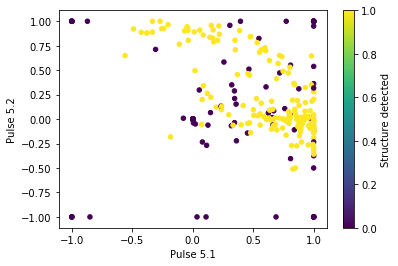

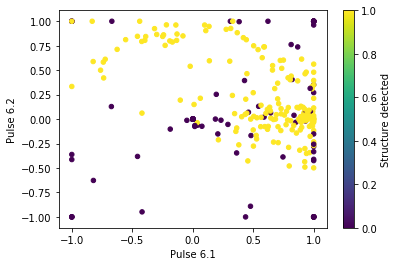

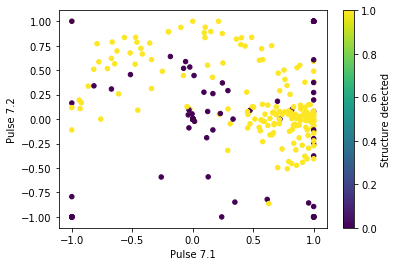

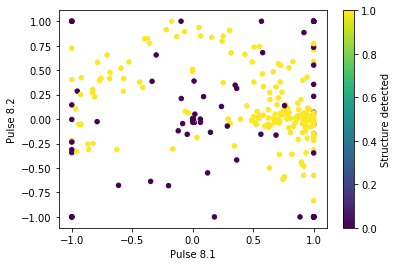

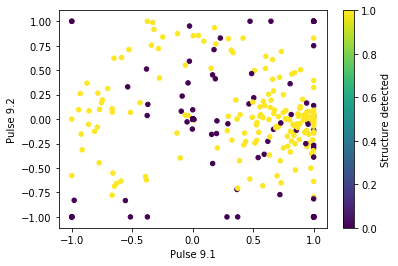

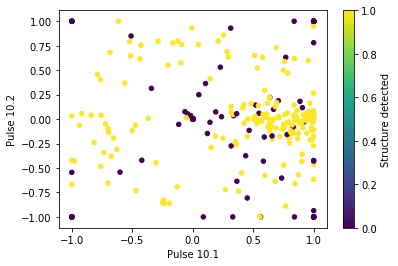

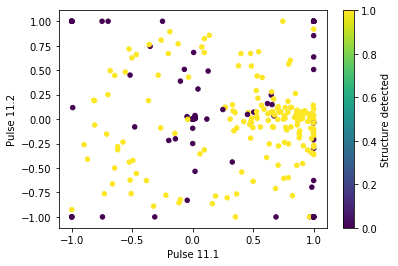

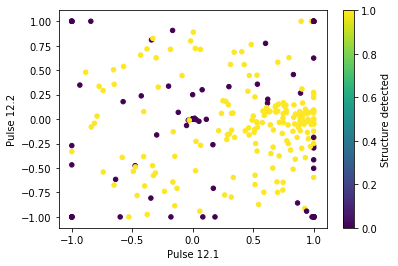

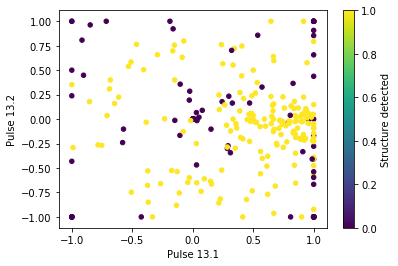

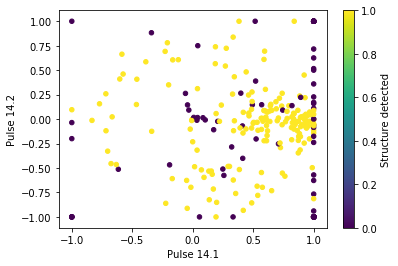

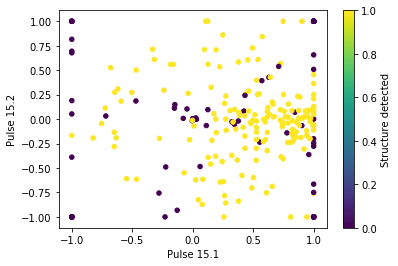

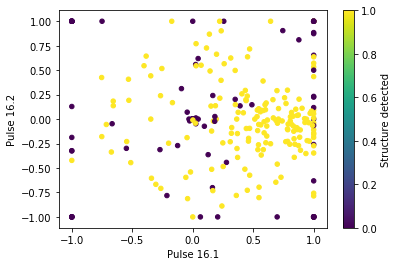

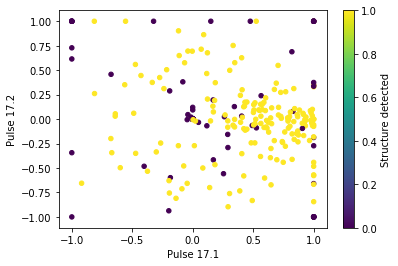

In [101]:
pulse_no1 = 2 # the Pulse we start with

for i in range(1, train.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
        xlabel = 'Pulse ' + str(pulse_no1) + '.' + str(1)
        ylabel = 'Pulse ' + str(pulse_no1) + '.' + str(2)
        
        fig, ax = plt.subplots()
        ax2 = train.plot.scatter(x=xlabel, y=ylabel, c = 'Structure detected', colormap='viridis', ax = ax)
    #clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))


#plt.show()
#ionosphere.reset_index().plot(x="Pulse 2.1", y='Pulse 2.2', c = 'Structure detected', ax = (0, 0), colormap='viridis', kind = 'scatter')
#ionosphere.reset_index().plot(x="Pulse 3.1", y='Pulse 3.2', c = 'Structure detected', ax = (0, 1), colormap='viridis', kind = 'scatter')
#ionosphere.diff().plot(ax=axes[r,c]).scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')
    
#ax1 = ionosphere.diff().plot.scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')

# 2. Implementing the models

## 2.1. Implementing logistic regression

In [102]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2 # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          #n_iterations = 300
                          eps# termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g
            
            n_iterations += 1
        
        print('Number of iterations:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy:', correct/(correct + incorrect))

Setting up the logistic regression:

In [103]:
LR = Logistic_Regression()

Running the fit function:

In [104]:
%time w = LR.fit(X_train, y_train)
w

Number of iterations: 31976
CPU times: user 11.8 s, sys: 41.3 ms, total: 11.8 s
Wall time: 11.9 s


array([-3.64907961,  1.69301104,  1.85020207,  0.89415826,  2.22673082,
        1.49871463,  0.43294369,  1.53793416,  1.1259827 ,  0.01113608,
       -1.10090311, -0.43412685, -0.38038243,  1.14737187,  0.89495457,
       -0.23685815,  0.48141385,  0.54388624, -0.12625378, -0.03818398,
       -0.18621209, -2.57329672,  0.9516751 ,  0.66089743,  0.54916621,
        1.15434499, -2.39770312,  0.02567321,  0.53776955,  0.57709167,
        0.55853345, -0.3626186 , -0.42601572, -1.10963481])

Separating the feature and the target values in the test dataset:

In [105]:
X_test = test.iloc[:, :-1] # feature values
y_test = test.iloc[:, -1] # target values

Running the predict function:

In [106]:
pred = LR.predict(X_test, w)

Checking how much of the test dataset was predicted correctly:

In [107]:
LR.evaluate_acc(pred, y_test)

Correct classifications: 55
Incorrect classifications: 6
Accuracy: 0.9016393442622951


## 2.2. Implementing Naïve Bayes

In [108]:
class GaussianNaiveBayes:
    def __init__(self):
        pass
    
    # The fit function returns the mean, the standard deviation, and the logariphmic prior probability
    def fit(self,
            X_train, # N x D
            y_train, # N x C
           ):
        N = y_train.shape[0]
        c = 0
        C = 1
        D = X_train.shape[1]
        self.mu, self.s = np.zeros((C, D)), np.zeros((C, D)) #mean and standard deviation

        inds = np.nonzero(y_train[:])[0] # indeces of non-zero classes
        self.mu = np.mean(X_train.iloc[inds, :])
        self.s = np.std(X_train.iloc[inds, :])
        self.log_prior = np.log(np.mean(y_train))
        
        return [self.mu, self.s, self.log_prior]
    
    def predict(self,
                X_test, # N_test x
               ):
        log_likelihood = - np.sum( np.log(self.s) + .5*(((X_test - self.mu)/self.s)**2), 1)
        
        pred = self.log_prior + log_likelihood #N_test x C
        
        # Converting to boolean...
        pred = (pred > 0)
        # ... and to binary:
        pred = pred.astype(int)
        return pred #N_test x C
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0 # a counter for retreiving information from predicted target values
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values.iloc[i] == 1)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values.iloc[i] == 0)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy:', correct/(correct + incorrect))

In [109]:
GNB = GaussianNaiveBayes()

In [110]:
mu, s, log_prior = GNB.fit(X_train, y_train)

In [111]:
pred = GNB.predict(X_test)
pred

0      0
9      0
13     1
16     0
18     0
      ..
337    1
338    0
343    1
344    1
349    1
Length: 61, dtype: int64

In [112]:
GNB.evaluate_acc(pred, y_test)

Correct classifications: 45
Incorrect classifications: 16
Accuracy: 0.7377049180327869


## 2.3. Implementing $k$-fold cross-validation

In [113]:
def k_fold_split(dataset, # the initial dataset
                 i, # i-th fold out of k 
                 k # number of folds
                ): 
    n = len(dataset)
    test = dataset[n*(i-1)//k:n*i//k]
    train = dataset[~n*(i-1)//k:~n*i//k]
    return train, test

In [114]:
ttrain, ttest = k_fold_split(ionosphere, 1, 5)

In [115]:
ttest

,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,1.00000,0.28046,1.00000,0.02477,1.00000,0.07764,1.00000,0.04317,0.98762,...,-0.39056,0.96414,-0.02174,0.86747,0.23360,0.94578,-0.22021,0.80355,-0.07329,1
66,0,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,-1.00000,1.00000,0.65625,0.00000,0.00000,1.00000,-1.00000,0
67,1,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,...,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,1
68,1,1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,0.50000,0.00000,0.00000,1.00000,-1.00000,1.00000,-1.00000,0


In [116]:
ttrain

,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,0.68148,0.10370,0.77037,0.03457,0.65185,0.08148,0.60988,-0.00494,0.79012,...,-0.12840,0.63773,-0.02451,0.76543,0.02222,0.61235,-0.07160,0.51358,-0.04691,1
275,1,0.60678,-0.02712,0.67119,0.04068,0.52881,-0.04407,0.50508,0.03729,0.70508,...,-0.03390,0.57262,0.00750,0.58644,-0.00339,0.58983,-0.02712,0.50169,0.06780,1
276,1,0.49515,0.09709,0.29612,0.05825,0.34951,0.00000,0.57282,-0.02427,0.58252,...,-0.15049,0.36547,0.03815,0.39320,0.17476,0.26214,0.00000,0.37379,-0.01942,1
277,1,0.98822,0.02187,0.93102,0.34100,0.83904,0.35222,0.74706,0.48906,0.73584,...,0.69714,-0.16556,0.60510,-0.16209,0.55805,-0.34717,0.44195,-0.33483,0.37465,1
